In [12]:
import numpy as np
import sympy as sp
from sympy.tensor.array import derive_by_array
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

In [13]:
dim = 2
x = sp.symbols("".join([f"x_{i+1} " for i in range(dim) ])[:-1])
f = lambda x : 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
D = lambda expr: derive_by_array(expr,x)
Df = sp.lambdify([x],D(f(x)))
Hf = sp.lambdify([x],D(D(f(x))))

In [14]:
epsilon = 1e-12
n= 2000
alpha = 1
rho = 0.94
gamma = 0.6
x_0 = np.array([1.2,1.2])

In [17]:
def backtracking(alpha, gamma, rho, x_k, f_k, Df_k, p_k):
    alpha_k = alpha
    backtracking = f(x_k + alpha_k*p_k) - (f_k + gamma*alpha_k*Df_k.T@p_k)
    while backtracking > 0 :
        alpha_k = alpha_k * rho
        backtracking = f(x_k + alpha_k*p_k) - (f_k + gamma*alpha_k*Df_k.T@p_k)
    return alpha_k

def newton(alpha, gamma, rho, n, x_0, f, Df, Hf):
    x_k = x_0
    x_list = [x_k]
    for i in range(n):
        f_k = f(x_k)
        Df_k = Df(x_k)
        B_k = Hf(x_k)
        p_k = -inv(B_k)@Df_k
        alpha_k = backtracking(alpha, gamma, rho, x_k, f_k, Df_k, p_k)
        print(alpha_k)
        x_k = x_k+alpha_k*p_k
        x_list.append(x_k)
        if norm(Df_k) < epsilon:
            break
    return x_list

def gradient_descent(alpha, gamma, rho, n, x_0, f, Df, Hf):
    x_k = x_0
    x_list = [x_k]
    for i in range(n):
        f_k = f(x_k)
        Df_k = Df(x_k)
        p_k = -Df_k
        alpha_k = backtracking(alpha, gamma, rho, x_k, f_k, Df_k, p_k)
        print(alpha_k)
        x_k = x_k+alpha_k*p_k
        x_list.append(x_k)
        if norm(Df_k) < epsilon:
            break
    
    return x_list


x_list1 = newton(alpha, gamma, rho, n, x_0, f, Df, Hf)
print("")
f_best = f(x_list1[-1])
x_list2 = gradient_descent(alpha, gamma, rho, n, x_0, f, Df, Hf)

f_list1 = np.apply_along_axis(f, axis = 0, arr=np.array(x_list1).T)
f_list2 = np.apply_along_axis(f, axis = 0, arr=np.array(x_list2).T)

0.7807489599999998
0.7807489599999998
1
0.7807489599999998
1
0.8835999999999999
0.8305839999999999
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7807489599999998
0.7339040223999997
0.6898697810559997
0.6898697810559997

0.0005603640759321245
0.000634182974119652
0.000634182974119652
0.000634182974119652
0.0006746627384251618
0.0015080808596155382
0.0020548747705235884
0.0013325402475562896
0.002631927643584167
0.001106786608976293
0.004886471943898037
0.0008122751442661573
0.16622936826240906
0.0006746627384251618
0.0007635386356101878
0.010267416186689105
0.0007177263174735764
0.0038151078882675705
0.0009192792488299653
0.04005422998906019
0.0006746627384251618
0.001106786608976293
0.0051983744084021675
0.0008641224939001673
0.8305839999999999
0.0006746627384251618
0

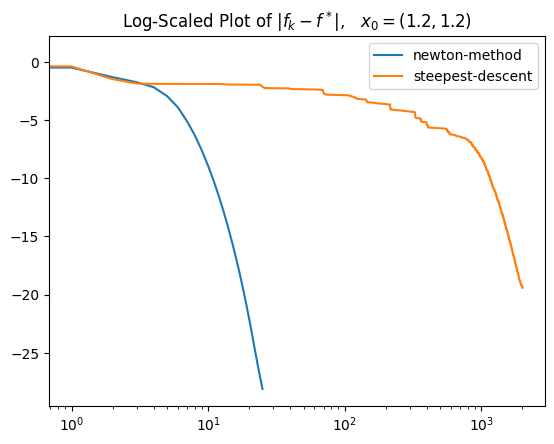

In [16]:
f_list1[f_list1 == f_best] = 1e-30
f_list2[f_list2 == f_best] = 1e-30
plt.plot(f_list1, label='newton-method' )
plt.xscale('log')
plt.title(f'Log-Scaled Plot of $f_k$,   $x_0 = ({x_0[0]}, {x_0[1]})$')
plt.legend()